In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [86]:
sw_ent_dict_list_4 = pickle.load(open( "sw_ent_dict_list_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(4, 'sca', 2), "rb" ) )
sw_ent_dict_list_6 = pickle.load(open( "sw_ent_dict_list_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(6, 'sca', 2), "rb" ) )
sw_ent_dict_list_8 = pickle.load(open( "sw_ent_dict_list_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(8, 'sca', 2), "rb" ) )
sw_ent_dict_list_10 = pickle.load(open( "sw_ent_dict_list_q{}_VVQE_SLSQP_{}_rep{}.pkl".format(10, 'sca', 2), "rb" ) )

In [87]:
def get_avg_entropies(sw_ent_dict_list):
    num_la = len(sw_ent_dict_list)
    num_W  = len(sw_ent_dict_list[0].keys())
    
    W_list = list(sw_ent_dict_list[0].keys())
    la_list = np.arange(num_la) + 1
    
    ent_arr = np.zeros((num_W, num_la))
    std_arr = np.zeros((num_W, num_la))
    for la_idx in range(num_la):
        for W_idx, W in enumerate(W_list):
            ent_arr[W_idx][la_idx] = np.mean(sw_ent_dict_list[la_idx][W])
            ent_arr[W_idx][la_idx] = np.std(sw_ent_dict_list[la_idx][W])

    return W_list, la_list, ent_arr

In [89]:
W_list_4, la_list_4, ent_arr_4 = get_avg_entropies(sw_ent_dict_list_4)
W_list_6, la_list_6, ent_arr_6 = get_avg_entropies(sw_ent_dict_list_6)
W_list_8, la_list_8, ent_arr_8 = get_avg_entropies(sw_ent_dict_list_8)
W_list_10, la_list_10, ent_arr_10 = get_avg_entropies(sw_ent_dict_list_10)

<IPython.core.display.Javascript object>


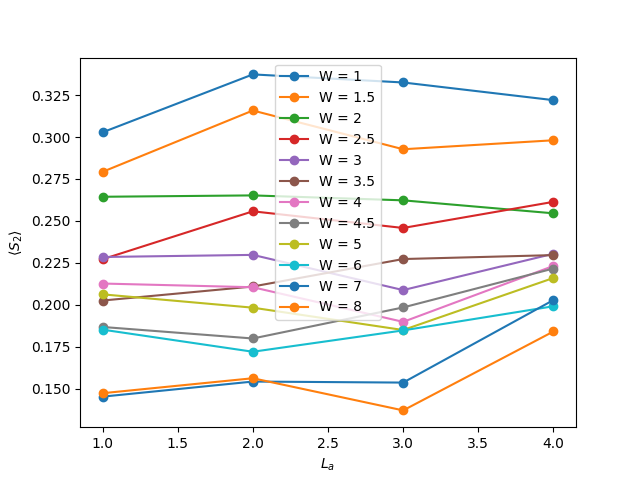

In [53]:
%matplotlib notebook
for W_idx, W in enumerate(W_list):
    plt.plot(la_list, ent_arr_8[W_idx,:], 'o-', label="W = {}".format(W))
plt.xlabel(r"$L_{a}$")
plt.ylabel(r"$\left<S_{2}\right>$")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


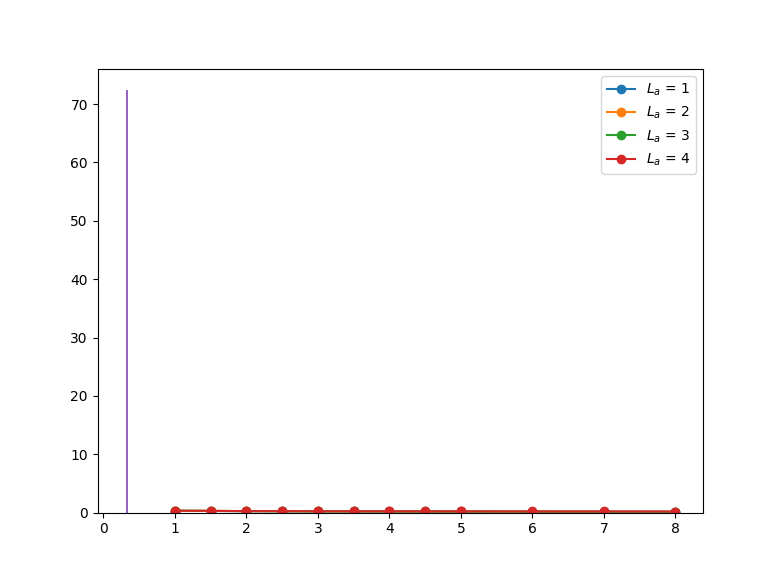

In [65]:
%matplotlib notebook
for la_idx, la in enumerate(la_list):
    plt.plot(W_list, ent_arr_8[:,la_idx], 'o-', label="{} = {}".format(r'$L_{a}$',la))
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


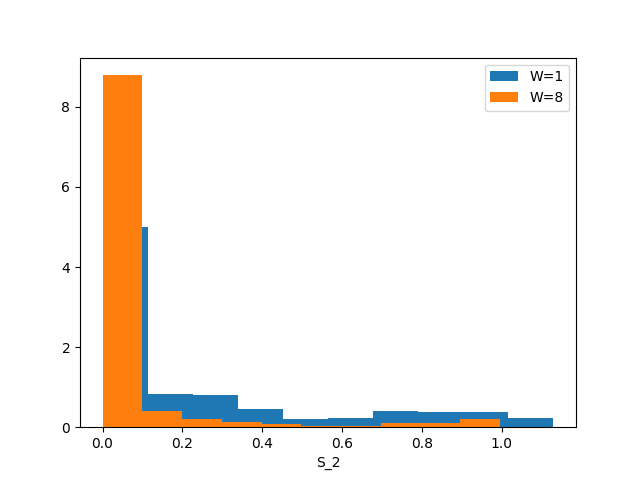

In [73]:
%matplotlib notebook
plt.hist(sw_ent_dict_list_8[-1][1], density=True, label="W=1")
plt.hist(sw_ent_dict_list_8[-1][8], density=True, label="W=8")

#plt.hist(ent_arr_8[-1,:], density=True, label="W=8")
plt.legend(loc='best')
plt.xlabel("S_2")
plt.show()

<IPython.core.display.Javascript object>


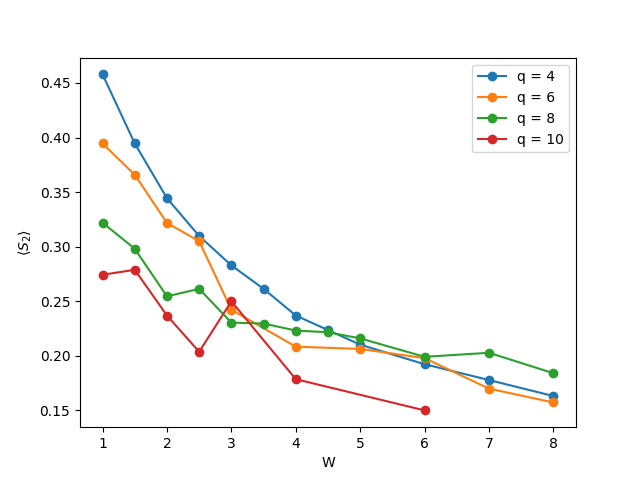

In [90]:
%matplotlib notebook
plt.plot(W_list_4, ent_arr_4[:,-1], 'o-', label="q = 4")
plt.plot(W_list_6, ent_arr_6[:,-1], 'o-', label="q = 6")
plt.plot(W_list_8, ent_arr_8[:,-1], 'o-', label="q = 8")
plt.plot(W_list_10, ent_arr_10[:,-1], 'o-', label="q = 10")
plt.legend(loc='best')
plt.xlabel("W")
plt.ylabel(r"$\left<S_{2}\right>$")
plt.show()


<IPython.core.display.Javascript object>


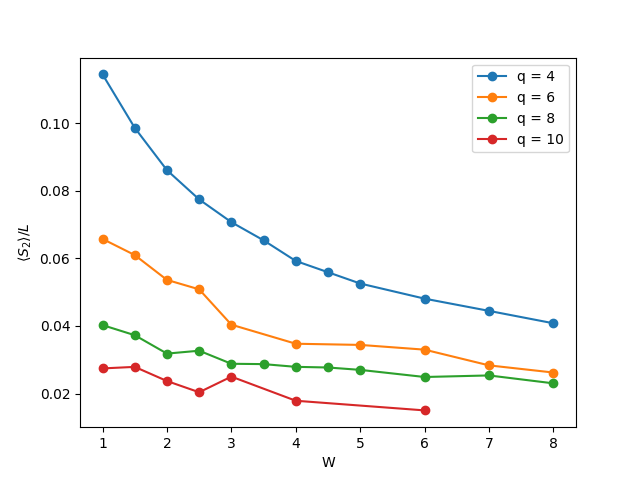

In [93]:
%matplotlib notebook
plt.plot(W_list_4, ent_arr_4[:,-1]/4, 'o-', label="q = 4")
plt.plot(W_list_6, ent_arr_6[:,-1]/6, 'o-', label="q = 6")
plt.plot(W_list_8, ent_arr_8[:,-1]/8, 'o-', label="q = 8")
plt.plot(W_list_10, ent_arr_10[:,-1]/10, 'o-', label="q = 10")

plt.legend(loc='best')
plt.xlabel("W")
plt.ylabel(r"$\left<S_{2}\right>/L$")
plt.show()